# Working with Time Series Data Exercises

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### San Francisco Temps Exercises

1. Resample by the day and take the average temperature. Visualize the average temperature over time.
2. Write the code necessary to visualize the minimum temperature over time.
3. Write the code necessary to visualize the maximum temperature over time.
4. Which month is the coldest, on average?
5. Which month has the highest average temperature?
6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


In [2]:
from vega_datasets import data
sf_temps = data.sf_temps()
sf_temps

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00
...,...,...
8754,50.40,2010-12-31 19:00:00
8755,49.90,2010-12-31 20:00:00
8756,49.40,2010-12-31 21:00:00
8757,48.80,2010-12-31 22:00:00


In [3]:
#check dtype. if not datetime, must convert
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
#must complete step 2&3 (set date as index and sort)
sf_temps = sf_temps.set_index('date').sort_index()

In [5]:
#confirm steps 2&3 complete
type(sf_temps.index)

pandas.core.indexes.datetimes.DatetimeIndex

#### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [6]:
sf_temps.resample('D').mean().head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


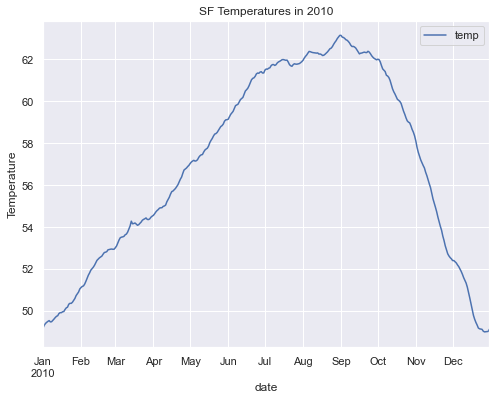

In [7]:
sf_temps.resample('D').mean().plot()
plt.title('SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 2. Write the code necessary to visualize the minimum temperature over time.

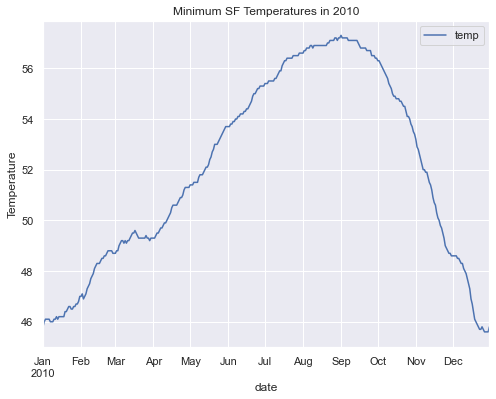

In [8]:
sf_temps.resample('D').min().plot()
plt.title('Minimum SF Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 3. Write the code necessary to visualize the maximum temperature over time.

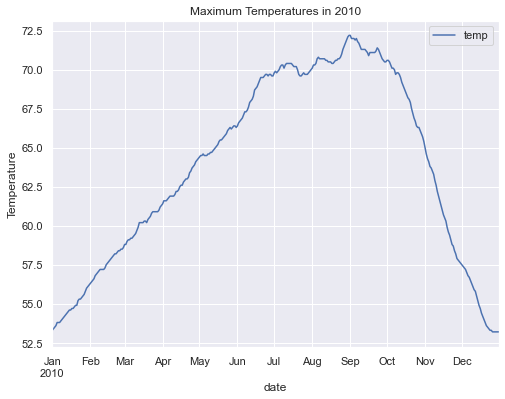

In [9]:
sf_temps.resample('D').max().plot()
plt.title('Maximum Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

#### 4. Which month is the coldest, on average?
- answer: January (2010-01-31) 

In [10]:
sf_temps.temp.resample('M').mean().sort_values()

date
2010-01-31   49.98
2010-12-31   50.50
2010-02-28   52.24
2010-03-31   53.96
2010-11-30   55.19
2010-04-30   55.63
2010-05-31   57.97
2010-10-31   60.25
2010-06-30   60.44
2010-07-31   61.77
2010-08-31   62.41
2010-09-30   62.49
Name: temp, dtype: float64

In [11]:
average_temps = sf_temps.resample('M').mean()

In [12]:
average_temps.min()

temp   49.98
dtype: float64

#### 5. Which month has the highest average temperature?
- answer: September (2010-09-30) 

In [13]:
sf_temps.temp.resample('M').mean().sort_values(ascending=False)

date
2010-09-30   62.49
2010-08-31   62.41
2010-07-31   61.77
2010-06-30   60.44
2010-10-31   60.25
2010-05-31   57.97
2010-04-30   55.63
2010-11-30   55.19
2010-03-31   53.96
2010-02-28   52.24
2010-12-31   50.50
2010-01-31   49.98
Name: temp, dtype: float64

In [14]:
average_temps.max()

temp   62.49
dtype: float64

#### 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
- Answer: August (2010-08-31) with 15.00 degrees

In [15]:
#resample temps by day- add min max columns
daily_temps = sf_temps.temp.resample('D').agg(['min', 'max'])

In [16]:
#take a look
daily_temps

,min,max
date,,
2010-01-01,45.80,53.30
2010-01-02,46.00,53.40
2010-01-03,46.10,53.50
2010-01-04,46.10,53.60
2010-01-05,46.10,53.80
...,...,...
2010-12-27,45.60,53.20
2010-12-28,45.60,53.20
2010-12-29,45.60,53.20


In [17]:
#create column that shows the temp difference between min and max
daily_temps['temp_diff'] = daily_temps['max'] - daily_temps['min']

In [18]:
#make sure new column was created
daily_temps

,min,max,temp_diff
date,,,
2010-01-01,45.80,53.30,7.50
2010-01-02,46.00,53.40,7.40
2010-01-03,46.10,53.50,7.40
2010-01-04,46.10,53.60,7.50
2010-01-05,46.10,53.80,7.70
...,...,...,...
2010-12-27,45.60,53.20,7.60
2010-12-28,45.60,53.20,7.60
2010-12-29,45.60,53.20,7.60


In [23]:
#sort the values to see temp difference to answer question
daily_temps.temp_diff.resample('M').max().sort_values(ascending=False)

date
2010-08-31   15.00
2010-09-30   14.90
2010-07-31   14.80
2010-06-30   14.80
2010-10-31   14.40
2010-05-31   13.10
2010-04-30   13.00
2010-03-31   12.00
2010-11-30   11.80
2010-02-28    9.90
2010-01-31    9.30
2010-12-31    8.90
Name: temp_diff, dtype: float64

#### 7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

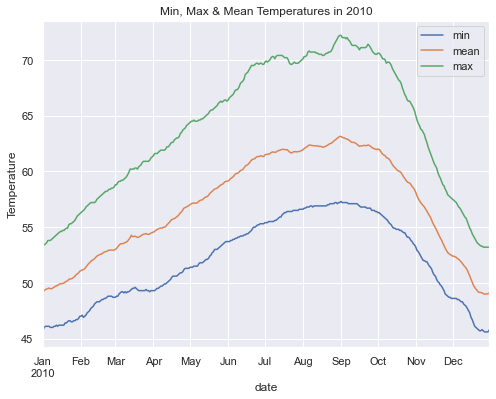

In [20]:
#resample temperatures by day- get min max and average
sf_temps.temp.resample('D').agg(['min', 'mean', 'max']).plot()
plt.title('Min, Max & Mean Temperatures in 2010')
plt.ylabel('Temperature')
plt.show()

<hr style="border:3px solid black"> </hr>

### Seatle Weather Exercises:

1. Which year and month combination has the highest amount of precipitation?
2. Visualize the amount of monthly precipitation over time.
3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4. Which year-month combination is the windiest?
5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6. In which month does it rain the most?
7. Which month has the most number of days with a non-zero amount of precipitation

In [21]:
from vega_datasets import data
data.seattle_weather()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.60,4.40,1.70,2.90,fog
1457,2015-12-28,1.50,5.00,1.70,1.30,fog
1458,2015-12-29,0.00,7.20,0.60,2.60,fog
1459,2015-12-30,0.00,5.60,-1.00,3.40,sun


#### 1. Which year and month combination has the highest amount of precipitation?

#### 2. Visualize the amount of monthly precipitation over time.

#### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

#### 4. Which year-month combination is the windiest?

#### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

#### 6. In which month does it rain the most?

#### 7. Which month has the most number of days with a non-zero amount of precipitation

<hr style="border:3px solid black"> </hr>

### Flight Exercises:

In [22]:
data.flights_20k()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,-6,1489,SEA,MCI
19997,2001-02-07 11:37:00,-16,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


1. Convert any negative delays to 0.
2. Which hour of the day has the highest average delay?
3. Does the day of the week make a difference in the delay amount?
4. Does the month make a difference in the delay amount?